In [ ]:
%matplotlib notebook

In [3]:
import site
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

site.addsitedir('/mnt/c/Users/austr/Downloads/') 
import illustris_python as il

In [4]:
basePath = '/mnt/c/Users/austr/Downloads//Illustris-3/'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135,fields=fields)
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])

In [17]:
dat = il.snapshot.loadSubhalo(basePath, 135, GroupFirstSub[4], 'stars', fields=None)

# 608, 1030
#Stellar magnitudes in eight bands: U, B, V, K, g, r, i, z
stel_mags = dat['GFM_StellarPhotometrics']

B = stel_mags[:,1]
V = stel_mags[:,2]

metals = dat['GFM_Metallicity']

coords = dat['Coordinates']

x_CM = np.mean(coords[:,0])
y_CM = np.mean(coords[:,1])
z_CM = np.mean(coords[:,2])

# center our data around orgin
#coords = coords - [x_CM, y_CM, z_CM]
T = 4600*(1/(0.92 * (B-V) + 1.7) + 1/(0.92 * (B-V) + 0.62))
T = (T - 1850) / 33000 * 100

result = {"pos-x": coords[:,0].tolist(),"pos-y": coords[:,2].tolist(),"pos-z": coords[:,1].tolist(), "T": T.tolist(), "count": np.shape(coords)[0]}
import json
with open('pos-T-data.json', 'w') as outfile:
    json.dump(result, outfile)
    
print(len(coords))

13363


In [ ]:
range_arr = [[coords[:,0].min(), coords[:,0].max()],[coords[:,1].min(), coords[:,1].max()]]
H_n, xedges, yedges  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr)
H_metals, xedges_metals, yedges_metals  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr, weights = metals)
H_mass, xedges_mass, yedges_mass  = np.histogram2d(x=coords[:,0], y = coords[:,1], bins = [25,25], range = range_arr, weights = masses)

# set 0s as 1s for nat log
H_n[H_n == 0] = 1  
H_metals[H_metals == 0] = 1   
H_mass[H_mass == 0] = 1   

H = [np.log(H_n), np.log(H_metals), np.log(H_mass)]
labels = [[np.floor(xedges), np.floor(yedges)], [np.floor(xedges_metals), np.floor(yedges_metals)], [np.floor(xedges_mass), np.floor(yedges_mass)]]

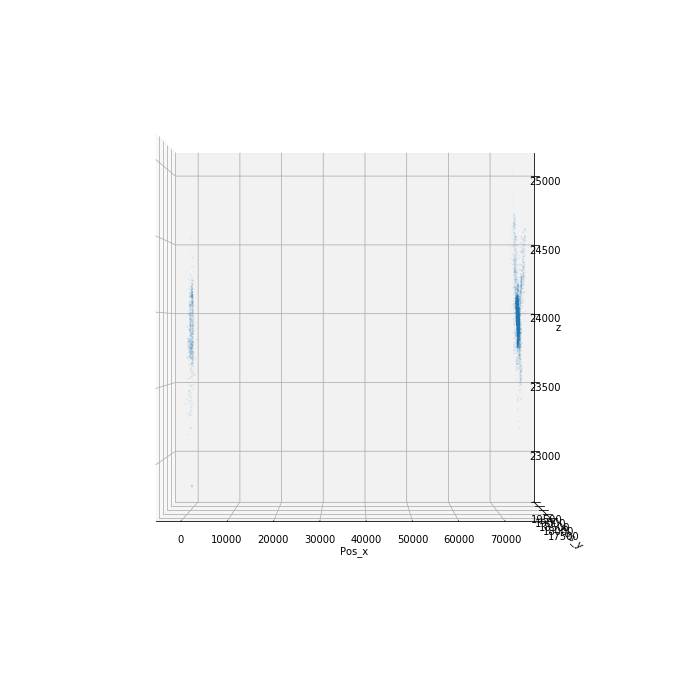

In [18]:
    
fig = plt.figure(figsize= (12,12))
ax = fig.gca(projection='3d')
ax.scatter(xs=coords[:,0], ys=coords[:,1], zs=coords[:,2], s = 0.005)
ax.set_xlabel('Pos_x')
ax.set_ylabel('Pos_y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=270)

In [ ]:
fig,axn = plt.subplots(1, 3, figsize= (9, 3))

i = 0 
for ax in axn.flat:
    sns.heatmap(data = H[i], ax=ax)
    ax.set(xlabel='X', ylabel='Y')    i = i + 1

In [15]:
for i in range(0, 100):
    print(GroupFirstSub[i])

0
608
1030
1396
1801
2074
2302
2569
2843
3053
3315
3528
3725
3960
4126
4269
4387
4498
4637
4741
4853
4980
5072
5165
5258
5337
5404
5473
5557
5635
5709
5778
5852
5928
6007
6100
6182
6262
6323
6389
6472
6549
6628
6713
6766
6827
6897
6971
7055
7099
7144
7187
7230
7292
7325
7401
7444
7492
7539
7600
7632
7669
7722
7768
7815
7862
7909
7941
7993
8036
8072
8101
8141
8173
8223
8274
8299
8349
8388
8423
8457
8491
8534
8574
8608
8654
8697
8736
8771
8793
8823
8848
8879
8904
8931
8964
8987
9020
9037
9068
